In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Customer data/BankCustomerData.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        42639 non-null  int64 
 1   job        42639 non-null  object
 2   marital    42639 non-null  object
 3   education  42639 non-null  object
 4   default    42639 non-null  object
 5   balance    42639 non-null  int64 
 6   housing    42639 non-null  object
 7   loan       42639 non-null  object
 8   contact    42639 non-null  object
 9   day        42639 non-null  int64 
 10  month      42639 non-null  object
 11  duration   42639 non-null  int64 
 12  campaign   42639 non-null  int64 
 13  pdays      42639 non-null  int64 
 14  previous   42639 non-null  int64 
 15  poutcome   42639 non-null  object
 16  Customer   42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [ ]:
data.shape

(42639, 17)

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Customer     0
dtype: int64

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df = data.copy()

In [ ]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,42639.000000,42639.000000,42639.000000
mean,34.169141,2.816412,0.465442
std,92.041713,3.163564,2.166705
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,536.000000,63.000000,275.000000


Text(0.5, 1.0, 'Education type vs Count')

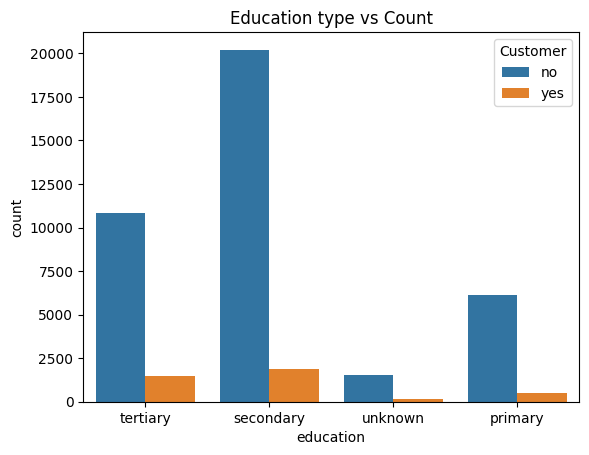

In [ ]:
sns.countplot(x="education",data=df, hue = "Customer")
plt.title("Education type vs Count")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

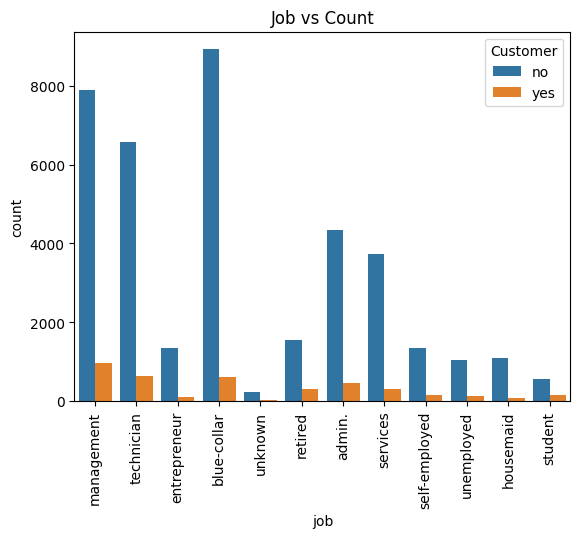

In [ ]:
sns.countplot(x="job", data = df, hue ="Customer")
plt.title("Job vs Count")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Martial Status vs Count')

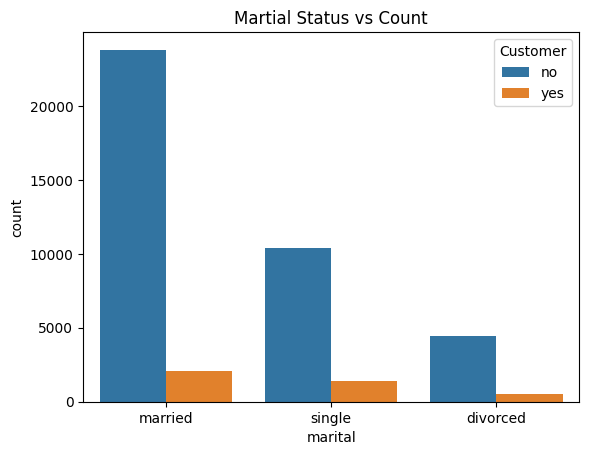

In [ ]:
sns.countplot(x="marital", data = df,hue ="Customer")
plt.title("Martial Status vs Count")

Text(0.5, 1.0, 'personal loan vs Count')

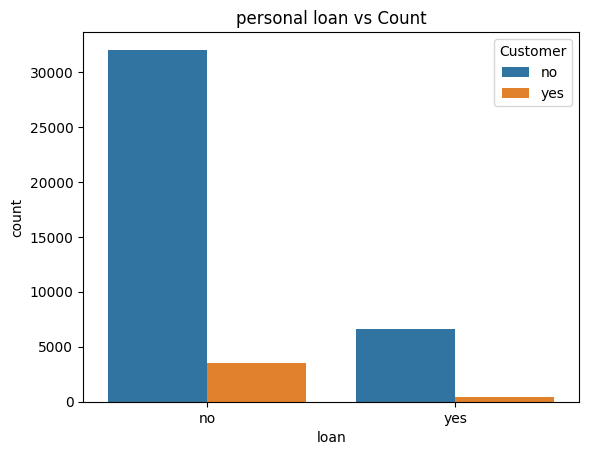

In [ ]:
sns.countplot(x="loan", data = df, hue ="Customer")
plt.title("personal loan vs Count")

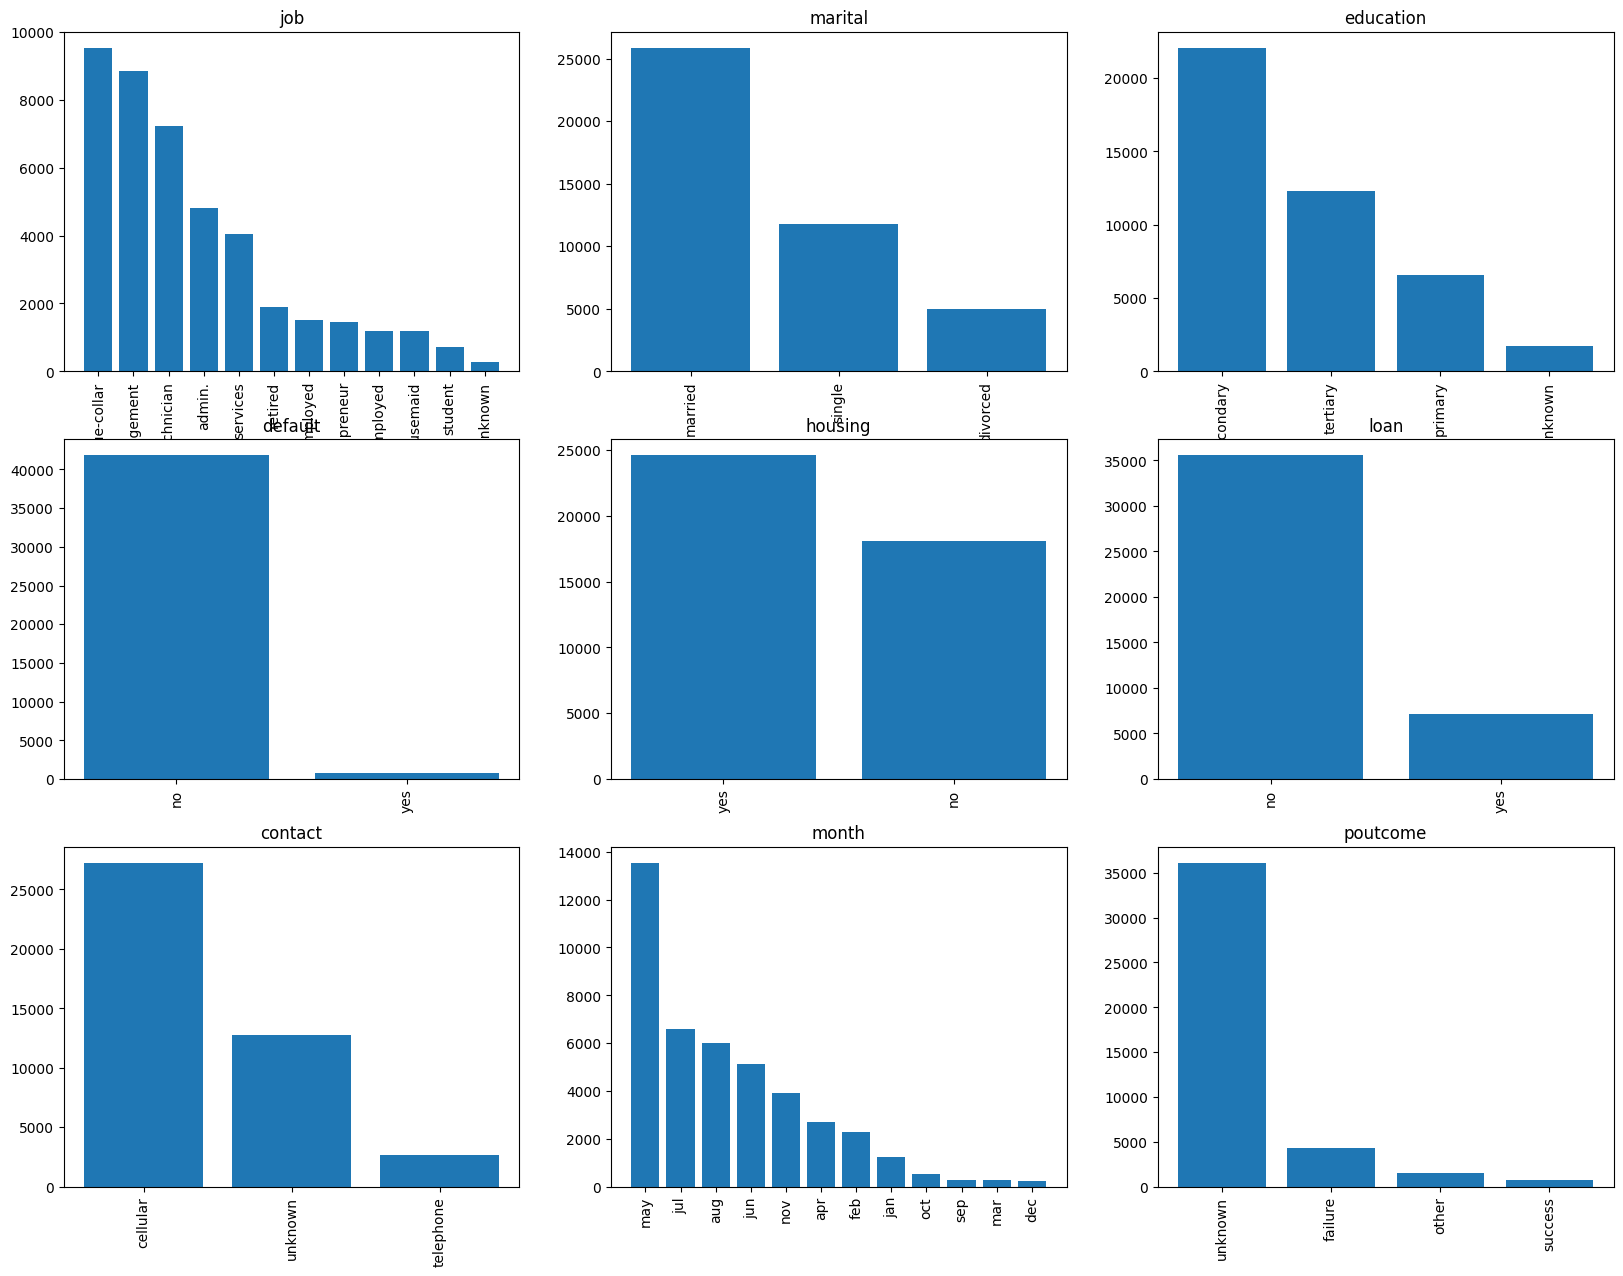

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

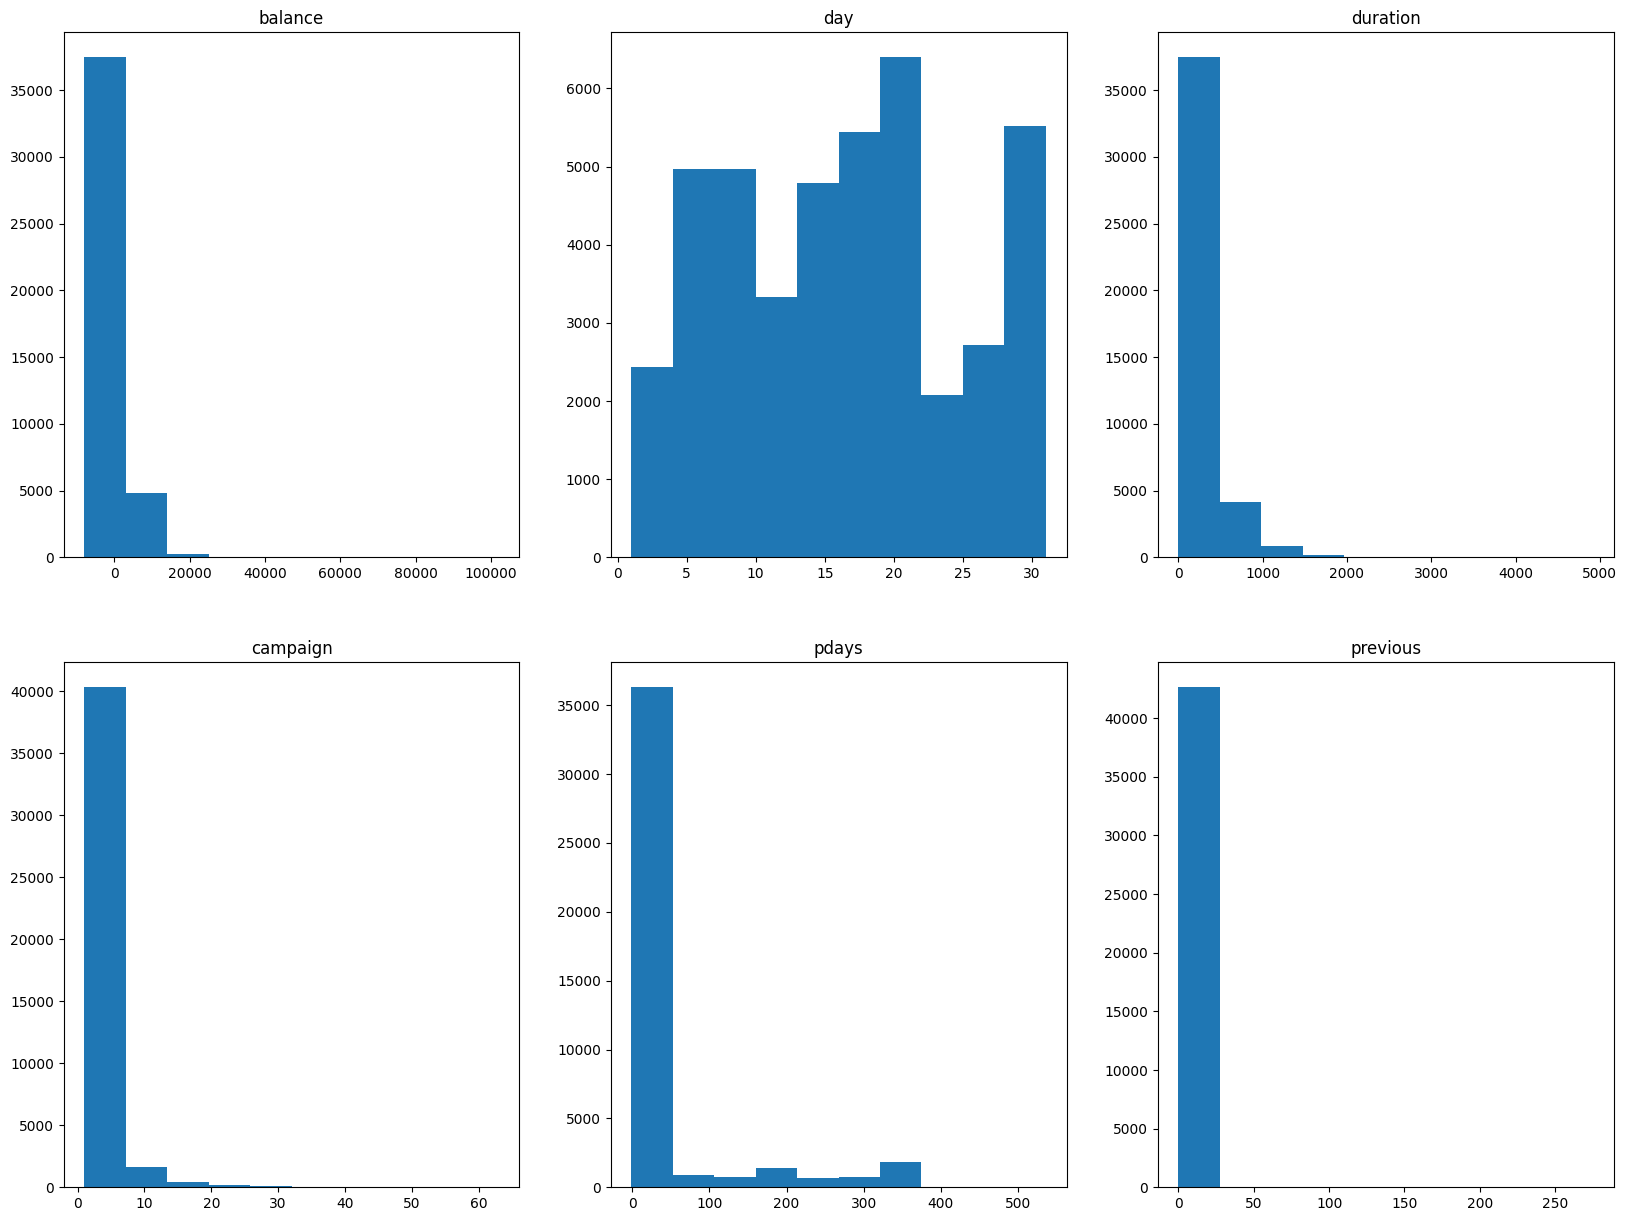

In [ ]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

<ipython-input-47-4e0a91d102dd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

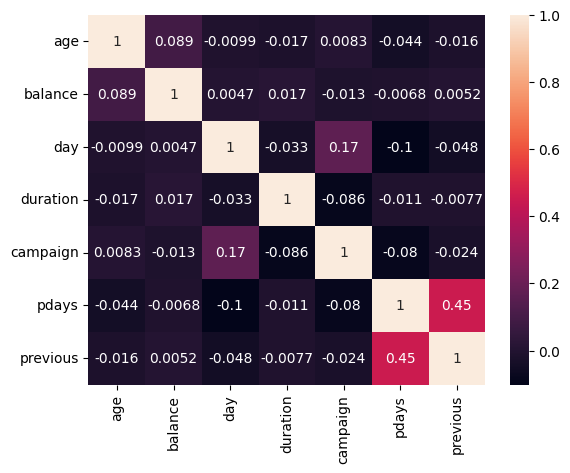

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)

In [ ]:
df.corr()

<ipython-input-48-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.088716,-0.009869,-0.016529,0.008296,-0.044165,-0.016279
balance,0.088716,1.000000,0.004696,0.016721,-0.013358,-0.006797,0.005194
day,-0.009869,0.004696,1.000000,-0.032557,0.165906,-0.101391,-0.048445
duration,-0.016529,0.016721,-0.032557,1.000000,-0.085640,-0.010812,-0.007730
campaign,0.008296,-0.013358,0.165906,-0.085640,1.000000,-0.079981,-0.024374
pdays,-0.044165,-0.006797,-0.101391,-0.010812,-0.079981,1.000000,0.450869
previous,-0.016279,0.005194,-0.048445,-0.007730,-0.024374,0.450869,1.000000


In [ ]:
df = pd.get_dummies(df,columns = ['job','marital','education','default','housing','month','loan','contact','poutcome'], drop_first = True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
df['Customer'].replace('yes', 1, inplace=True)
df['Customer'].replace('no', 0, inplace=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
target = df['Customer']
df = df.drop('Customer',axis = 1)
columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=[columns])
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf 
from tensorflow.keras.layers import Input, Dense, Flatten,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [ ]:
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,0.038961,0.095392,0.366667,0.134404,0.016129,0.173184,0.003636,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
42635,0.896104,0.092686,0.366667,0.104107,0.016129,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
42636,0.207792,0.133795,0.400000,0.056527,0.048387,0.182495,0.003636,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42637,0.051948,0.075109,0.400000,0.029077,0.016129,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y = np.array(target)
X = df

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,y)

In [ ]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [ ]:
f_Scores = pd.concat([df_columns,df_scores],axis=1)               
f_Scores.columns = ['Specs','Score']  

In [ ]:
f_Scores   

,Specs,Score
0,"(age,)",0.210683
1,"(balance,)",0.823236
2,"(day,)",4.085821
3,"(duration,)",394.041452
4,"(campaign,)",12.788566
5,"(pdays,)",21.665815
6,"(previous,)",1.727698
7,"(job_blue-collar,)",94.699973
8,"(job_entrepreneur,)",7.837730
9,"(job_housemaid,)",8.143392


In [ ]:
print(f_Scores.nlargest(10,'Score')) 

                  Specs        Score
40  (poutcome_success,)  1685.493466
34         (month_oct,)   783.058572
31         (month_mar,)   469.515711
38   (contact_unknown,)   436.915876
35         (month_sep,)   394.344870
3           (duration,)   394.041452
26         (month_dec,)   355.971843
32         (month_may,)   190.496681
24       (housing_yes,)   180.351393
11       (job_retired,)   135.208372


In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
import collections
x_resampled, y_resampled = SMOTE().fit_resample(X,y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 38678), (1, 38678)]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#Miscellanous libraries
from collections import Counter

Class=0, n=38678 (90.710%)
Class=1, n=38678 (90.710%)


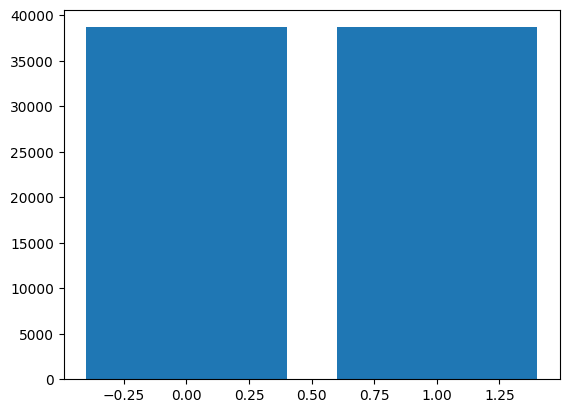

In [ ]:
counter = Counter(y_resampled)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
x_resampled.shape,y_resampled.shape

((77356, 42), (77356,))

In [ ]:
len(y_resampled)

77356

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_resampled,y_resampled,train_size=0.80, shuffle=True, random_state=45)

In [ ]:
X_train.shape, X_test.shape

((61884, 42), (15472, 42))

In [ ]:
y_test.shape

(15472,)

In [ ]:
X_train_2d=np.expand_dims(X_train,axis=2)
n_timesteps,n_features=X_train_2d.shape[1],X_train_2d.shape[2]
model=Sequential()
model.add(Conv1D(filters=20,kernel_size=2,activation="relu",input_shape=(n_timesteps,n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 41, 20)            60        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 20)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 10)                4010      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
______________________________________________________

In [ ]:

from tensorflow import keras

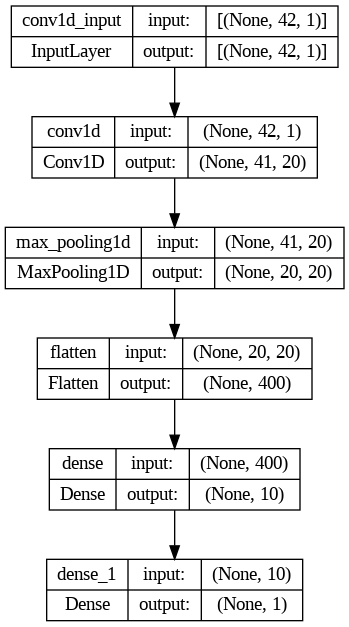

In [ ]:
keras.utils.plot_model(model,to_file='cnn.png',show_shapes=True)

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])

In [ ]:

history = model.fit(X_train_2d, y_train,validation_split=0.2,epochs=10,batch_size=100)

Epoch 1/10
496/496 [==============================] - 4s 8ms/step - loss: 0.3441 - accuracy: 0.8601 - val_loss: 0.3335 - val_accuracy: 0.8669
Epoch 2/10
496/496 [==============================] - 2s 4ms/step - loss: 0.3398 - accuracy: 0.8614 - val_loss: 0.3329 - val_accuracy: 0.8645
Epoch 3/10
496/496 [==============================] - 3s 6ms/step - loss: 0.3360 - accuracy: 0.8628 - val_loss: 0.3281 - val_accuracy: 0.8670
Epoch 4/10
496/496 [==============================] - 3s 5ms/step - loss: 0.3315 - accuracy: 0.8657 - val_loss: 0.3245 - val_accuracy: 0.8719
Epoch 5/10
496/496 [==============================] - 2s 4ms/step - loss: 0.3289 - accuracy: 0.8674 - val_loss: 0.3222 - val_accuracy: 0.8786
Epoch 6/10
496/496 [==============================] - 2s 4ms/step - loss: 0.3246 - accuracy: 0.8694 - val_loss: 0.3175 - val_accuracy: 0.8745
Epoch 7/10
496/496 [==============================] - 3s 6ms/step - loss: 0.3204 - accuracy: 0.8722 - val_loss: 0.3315 - val_accuracy: 0.8824
Epoch 

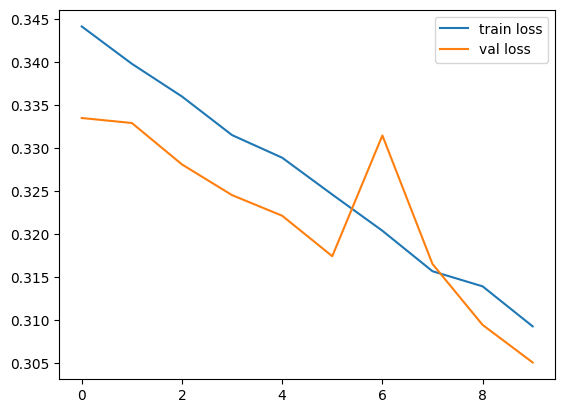

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss')

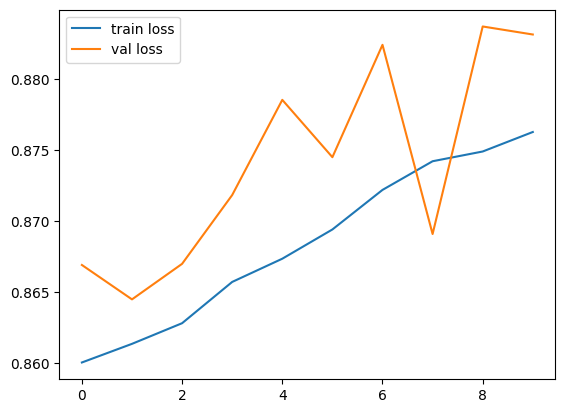

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='train loss')
plt.plot(history.history['val_accuracy'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Accuracy')

In [ ]:
from sklearn import metrics

In [ ]:
preds = np.round(model.predict((X_test)),0)
print("rounded test_labels",preds)

484/484 [==============================] - 2s 3ms/step
rounded test_labels [[0.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [ ]:
test_labels = np.array((y_test))

In [ ]:
experiment_labels = ["0","1"]
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      7778
           1       0.86      0.89      0.88      7694

    accuracy                           0.88     15472
   macro avg       0.88      0.88      0.88     15472
weighted avg       0.88      0.88      0.88     15472



484/484 [==============================] - 1s 1ms/step


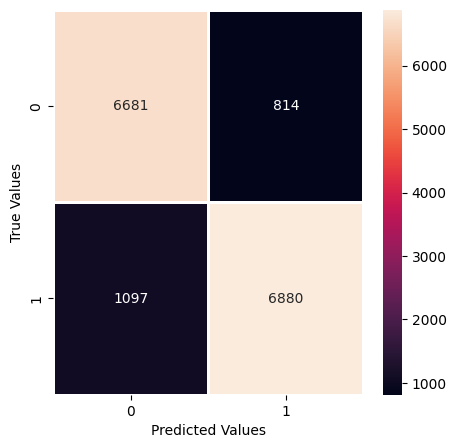

In [ ]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(5, 5))

pred = model.predict(X_test)



mat = confusion_matrix(y_test,preds)
sns.heatmap(mat.T, linewidths=1, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()